In [414]:
import pandas as pd
import json
#pip install matplotlib 
import matplotlib.pyplot as plt
#pip install seaborn
import seaborn as sns


In [415]:
#reading json file
file = open("start.json","r")
json = json.loads(file.read())

In [416]:
#converting json file into pandas dataframe
df = pd.json_normalize(json,sep = "_") # seperate nested dic keys by firstKey "_" SecondKey
columns = df.columns
print(columns.to_list())

['ABS', 'ActiveSafetySysNote', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam', 'AdaptiveHeadlights', 'AdditionalErrorText', 'AutoReverseSystem', 'AutomaticPedestrianAlertingSound', 'AxleConfiguration', 'Axles', 'BasePrice', 'BedLengthIN', 'BedType', 'BlindSpotIntervention', 'BlindSpotMon', 'BodyCabType', 'BodyClass', 'BusFloorConfigType', 'BusLength', 'BusType', 'CAN_AACN', 'CIB', 'CashForClunkers', 'ChargerLevel', 'ChargerPowerKW', 'CoolingType', 'CurbWeightLB', 'CustomMotorcycleType', 'DaytimeRunningLight', 'DestinationMarket', 'DisplacementCC', 'DisplacementCI', 'DisplacementL', 'Doors', 'DriveType', 'DriverAssist', 'EDR', 'ESC', 'EVDriveUnit', 'ElectrificationLevel', 'EntertainmentSystem', 'ErrorCode', 'ErrorText', 'ForwardCollisionWarning', 'FuelInjectionType', 'FuelTypePrimary', 'FuelTypeSecondary', 'GCWR', 'GCWR_to', 'GVWR', 'GVWR_to', 'KeylessIgnition', 'LowerBeamHeadlampLightSource', 'Make', 'MakeID', 'Manufacturer', 'ManufacturerId', 'Model', 'ModelID', 'ModelYear', 'Motorcyc

In [417]:
#Visualizing most popular cars in the dataset by Company. 
# Company name is stored in Make column

#Get counts of each Unique value in Make column
cars_by_make = df.groupby("Make")["Make"].count().to_frame("Count").reset_index()
cars_by_make

""" This is equivalent to following code in sql
Select Make, COUNT(*)
FROM db
GROUP BY MAKE;
"""

,Make,Count
0,ACURA,1
1,BMW,1
2,BUICK,1
3,CADILLAC,1
4,CHEVROLET,11
5,CHRYSLER,1
6,DODGE,5
7,FORD,482
8,GMC,4
9,HONDA,4


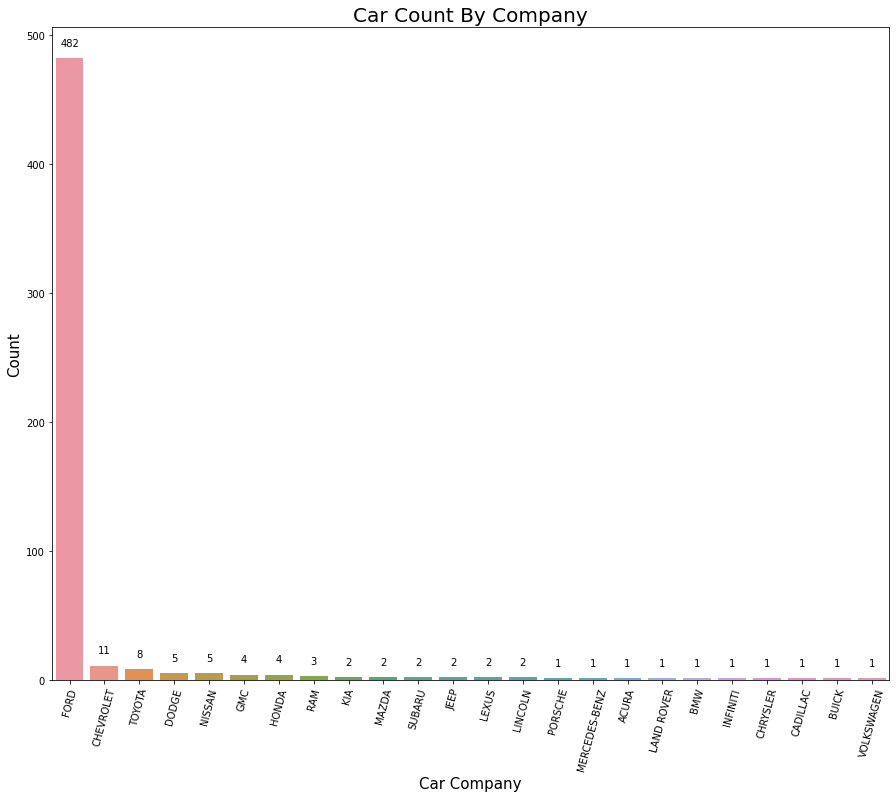

In [418]:
#function to annotate bar with their corresponding values
def annotate_bar(plot,size,rotation):
    for bar in plot.patches:
      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        plot.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=size, xytext=(0, 15),
                       textcoords='offset points',rotation = rotation)

#Defining the plotsize
plt.figure(figsize = (15,12))
plots = sns.barplot(x = "Make", y = "Count", data = cars_by_make,
                   order = cars_by_make.sort_values('Count', ascending = False).Make)
annotate_bar(plots,size=10,rotation=0)
plt.xlabel('Car Company', size = 15)
plt.ylabel('Count', size = 15)
plt.xticks(rotation=75)
plt.title("Car Count By Company", size = 20)
plt.show()

Looks like Ford is the most popular make in the dataset. Let's dive more into Ford cars. In the part, I'll try to
explore Ford car models and rank them by their popularity. 

In [419]:
#Select only the rows where Make is FORD
ford_df  = df.loc[df["Make"]== "FORD"]

#Group the results by "Model"
ford_models = ford_df.groupby("Model")["Model"].count().to_frame("Count").reset_index()
# df[]df.groupby(["Make","Model"])[["Make","Model"]].count()#.to_frame("Count").reset_index
ford_models


"""
Equivalent SQL CODE
SELECT MODEL, COUNT(*)
FROM db
WHERE Make = 'FORD'
GROUP BY MODEL;
"""

,Model,Count
0,Ecosport,3
1,Edge,11
2,Escape,25
3,Expedition,15
4,Expedition MAX,16
5,Explorer,39
6,F-150,231
7,F-250,50
8,F-350,9
9,F-450,2


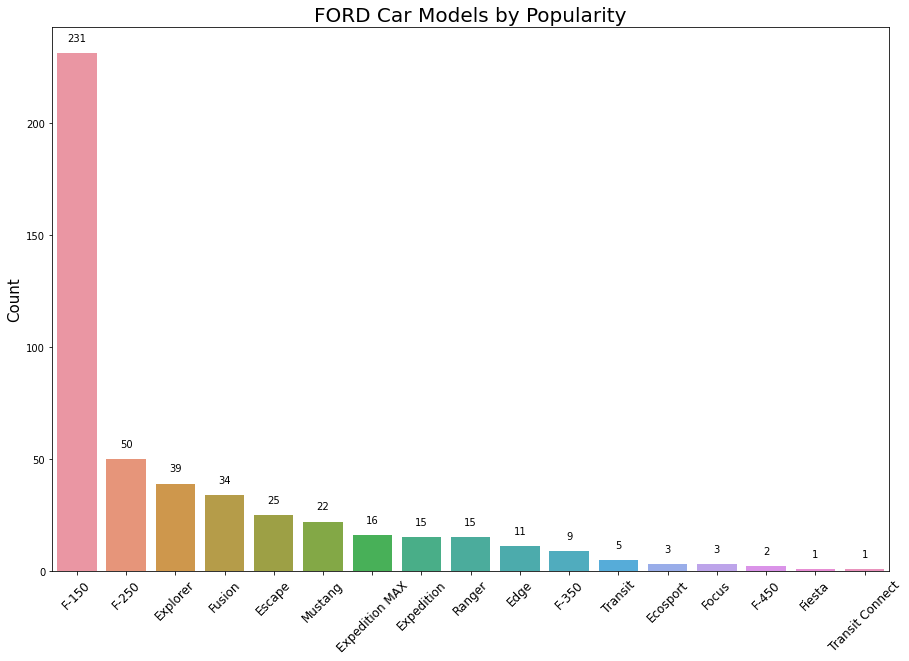

In [420]:
#Defining the plotsize
plt.figure(figsize = (15,10))
plots = sns.barplot(x = "Model", y = "Count", data = ford_models,
                   order = ford_models.sort_values('Count', ascending = False).Model)
annotate_bar(plots,size=10, rotation = 0)
plt.xlabel(None)
plt.ylabel('Count', size = 15)
plt.xticks(rotation= 45, size = 12)
plt.title("FORD Car Models by Popularity", size = 20)
plt.show()

Ford F-150 is the most popular among all Ford Models. 

The dataset has a lot of information of BodyClass type of the cars - Pickup, Sedan, SUV, etc. Lets see what car type is most popular in the dataset. 


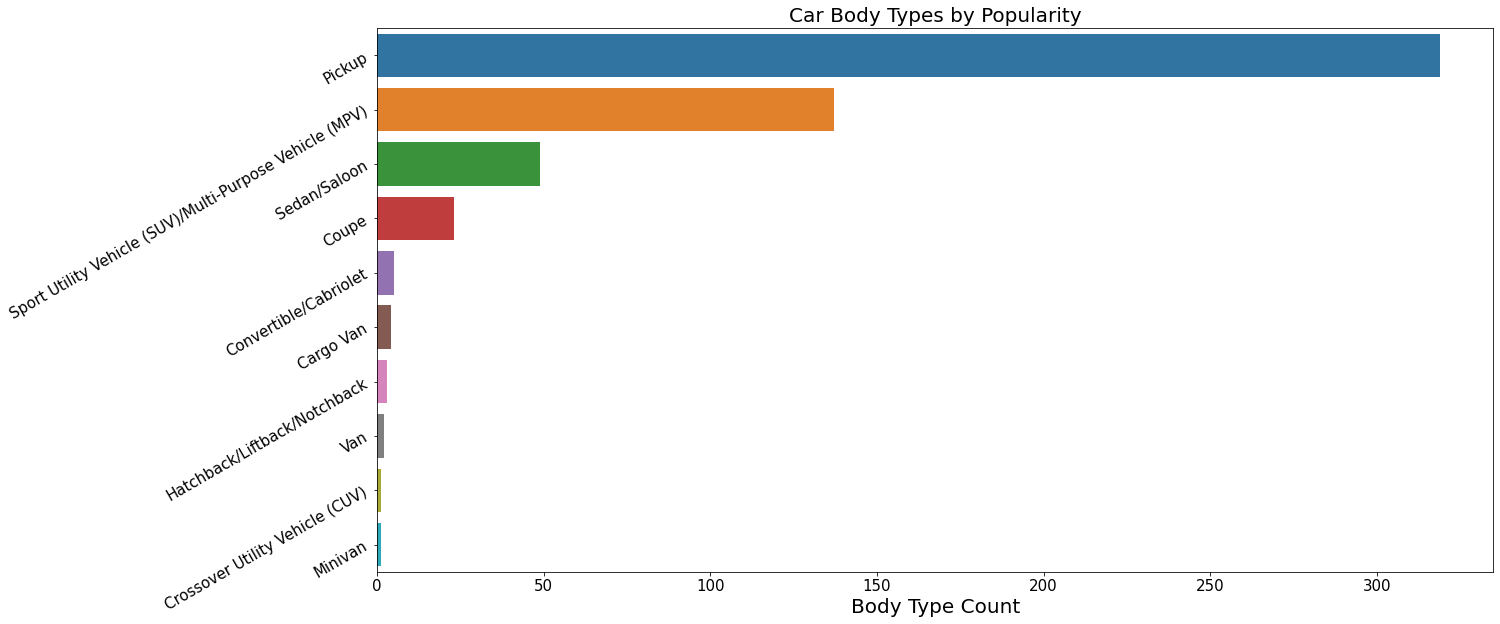

In [421]:
cars_by_bodytype = df.groupby("BodyClass")["BodyClass"].count().to_frame("Count").reset_index()
plt.figure(figsize = (20,10))
plots = sns.barplot(x = "Count", y = "BodyClass",data = cars_by_bodytype,
                    order = cars_by_bodytype.sort_values('Count', ascending = False).BodyClass)
plt.xlabel('Body Type Count', size = 20)
plt.ylabel(None)
plt.xticks(size=15)
plt.yticks(rotation=30, size = 15)
plt.title("Car Body Types by Popularity", size = 20)
plt.show()


Looks like Pickup Trucks are the most popular cars in this dataset followed by SUV/MPV. 


In the following parts, I will be exploring where cars were made - by countries and the by states. 


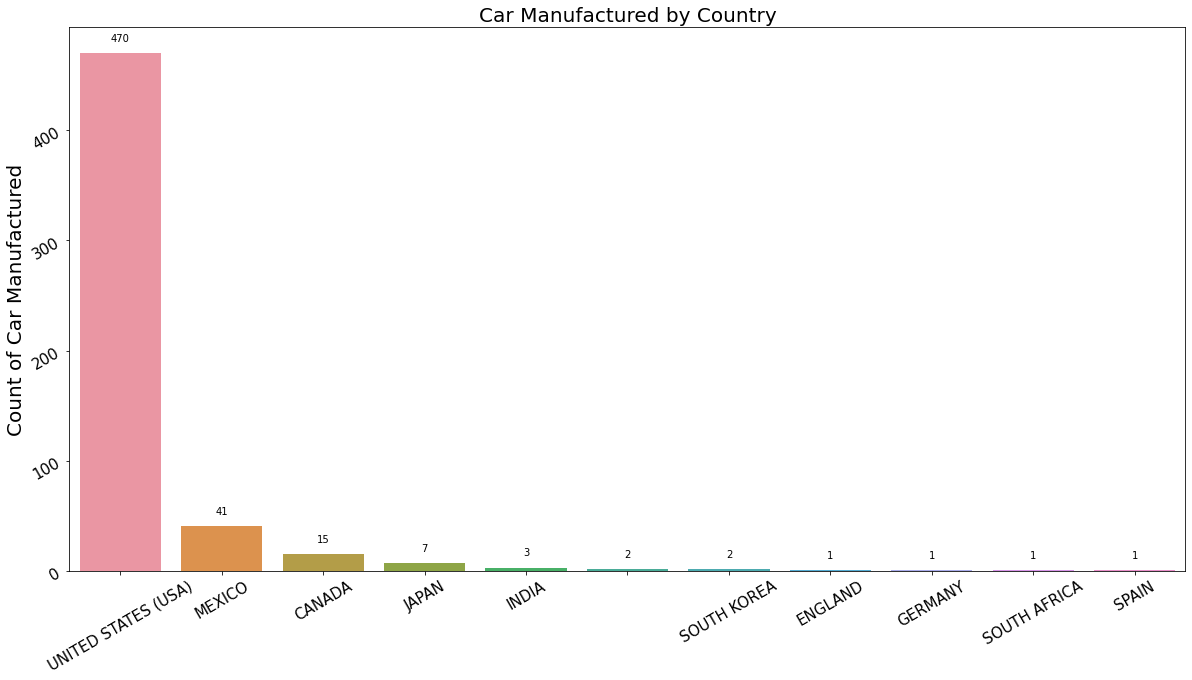

In [422]:
#Country Information in provided in "plant_country" Column. 
#selecting only the rows where plant's country details are provided
df_country = df[pd.notnull(df["plant_country"])]
country_groupby = df_country.groupby("plant_country")["plant_country"].count().to_frame("Count").reset_index()
plt.figure(figsize = (20,10))
plots = sns.barplot(x = "plant_country", y = "Count",data = country_groupby,
                    order = country_groupby.sort_values('Count', ascending = False).plant_country)
annotate_bar(plots,size=10,rotation=0)
plt.xlabel(None)
plt.ylabel("Count of Car Manufactured", size = 20)
plt.xticks(size=15,rotation=30)
plt.yticks(rotation=30, size = 15)
plt.title("Car Manufactured by Country", size = 20)
plt.show()

Most of the cars present in the dataset were manufactured in the US followed by Mexico and then by Canada.

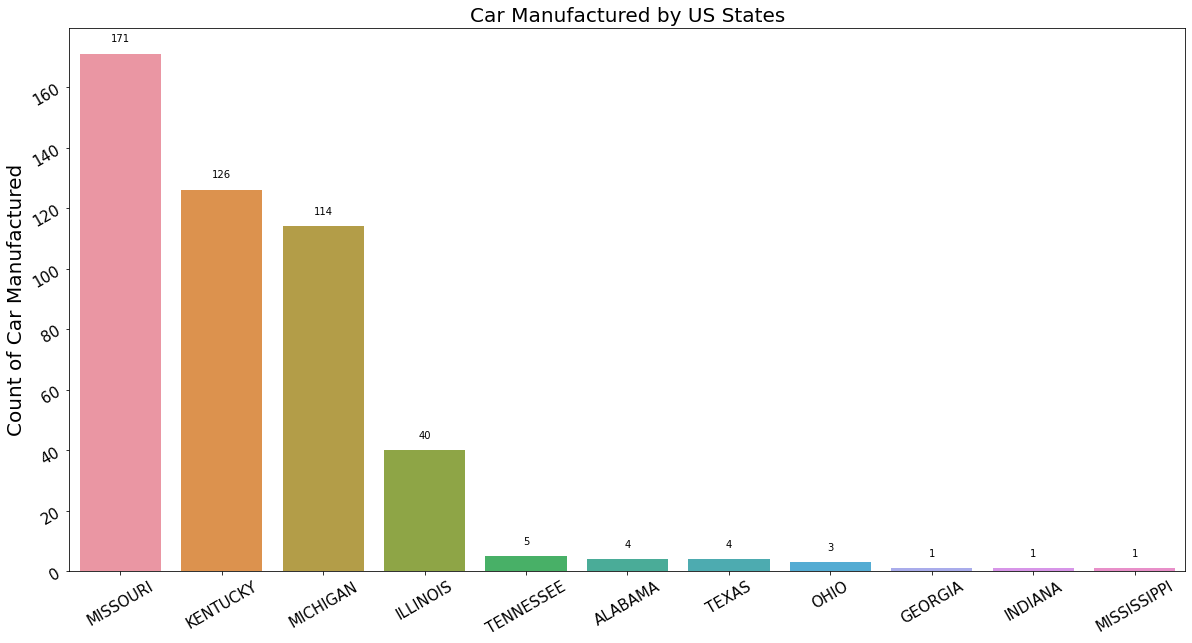

In [423]:
#State Information in provided in "plant_state" Column. 
#selecting only the rows where Country is USA

df_state = df[df["plant_country"].str.contains('USA')]
state_groupby = df_state.groupby("plant_state")["plant_state"].count().to_frame("Count").reset_index()
plt.figure(figsize = (20,10))
plots = sns.barplot(x = "plant_state", y = "Count",data = state_groupby,
                    order = state_groupby.sort_values('Count', ascending = False).plant_state)
annotate_bar(plots,size=10,rotation=0)
plt.xlabel(None)
plt.ylabel("Count of Car Manufactured", size = 20)
plt.xticks(size=15,rotation=30)
plt.yticks(rotation=30, size = 15)
plt.title("Car Manufactured by US States", size = 20)
plt.show()

Highest number of cars present in this dataset were manufactured in Missouri, followed by Kentucky and then by Michigan. Since most of the cars in this dataset are Ford - as shown in the first graph. My final visualizaion will be to see where FORD Manufactures most of the cars present in this dataset. 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


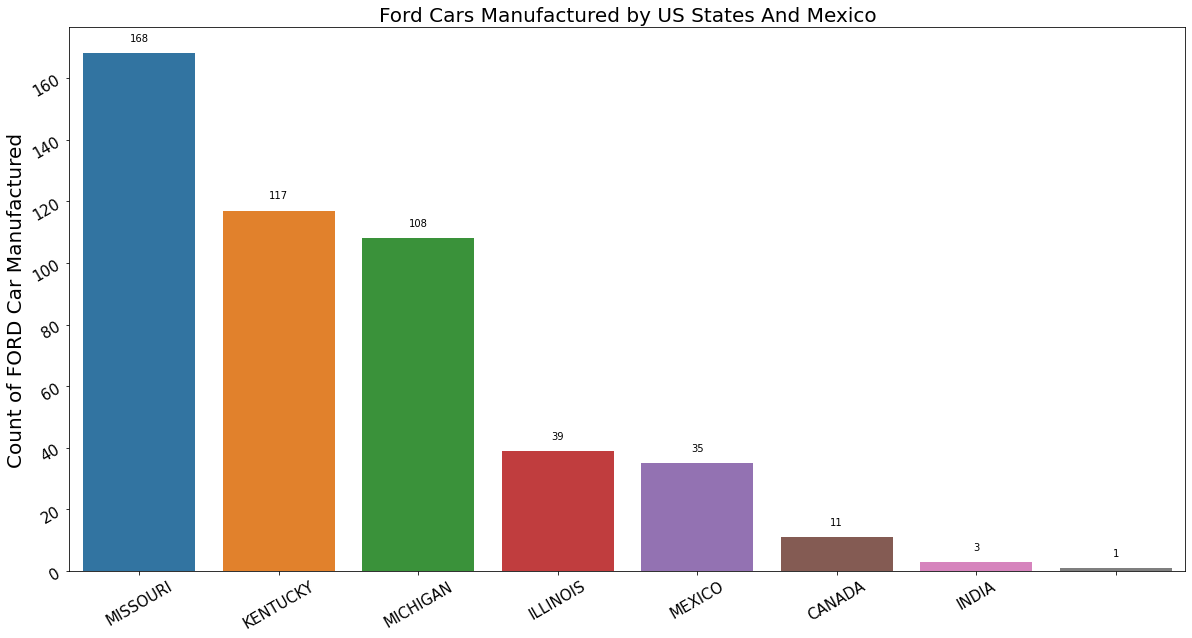

In [427]:
#some ford cars are manufactured in Mexico and canada, and the plant_state column has no value for those records.
#lets replace plant_state with Mexico for the rows where plant_country is Mexico and plant state with canada where
#plant country is canada

#select only rows that contains "FORD" in "Make" columns
Ford_cars = df[df["Make"].str.contains('FORD')]

#replace plant state with "Mexico" if plant country is mexico
Ford_cars.loc[Ford_cars.plant_country == "MEXICO", "plant_state"] = "MEXICO"
Ford_cars.loc[Ford_cars.plant_country == "CANADA", "plant_state"] = "CANADA"
Ford_cars.loc[Ford_cars.plant_country == "INDIA", "plant_state"] = "INDIA"


Ford_cars_groupby = Ford_cars.groupby("plant_state")["plant_state"].count().to_frame("Count").reset_index()
plt.figure(figsize = (20,10))
plots = sns.barplot(x = "plant_state", y = "Count",data = Ford_cars_groupby,
                    order = Ford_cars_groupby.sort_values('Count', ascending = False).plant_state)
annotate_bar(plots,size=10,rotation=0)
plt.xlabel(None)
plt.ylabel("Count of FORD Car Manufactured", size = 20)
plt.xticks(size=15,rotation=30)
plt.yticks(rotation=30, size = 15)
plt.title("Ford Cars Manufactured by US States And Mexico", size = 20)
plt.show()




Fords seems to produce most of the US produced cars in Missouri, Kentuckty, Michigan and Illinois. In terms of International Productuion, Mexico seems to prodcue the most cars followed by Canada. India seems to produce the least. 
